In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [2]:
data = pd.read_csv('data/online_retail_II.csv', parse_dates=['InvoiceDate'])
df = data.copy()
display(df.tail(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.isna().sum().to_frame().T

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,0,1454,0,0,0,135080,0


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; REMOVE MISSING CUSTOMERS - Separate the missing customer id from the data and keep a backup </p>

In [5]:
df['Customer ID'].value_counts(dropna=False, normalize=True).to_frame().head(5).T

Customer ID,NaN,17841.0,14911.0,14096.0,12748.0
proportion,0.249266,0.014731,0.010893,0.009463,0.008566


In [6]:
df_mc = df[df['Customer ID'].isna()].copy() # Missing Customers
df_mc['Customer ID'] = 0

In [7]:
df.dropna(subset='Customer ID', ignore_index=True, inplace=True)
df['Customer ID'] = df['Customer ID'].astype('int')

<p style="background-image: linear-gradient(#f87674, #ffffff 10%); font-weight:bold;">
    &nbsp; ALTERNATIVE - If there is no customer with ID number 0 (zero), set the missing customer ID to zero </p>

In [8]:
if not (df['Customer ID']==0).any(): 
    # Already dropped
    df.fillna({'Customer ID':0}, inplace=True)

<p style="background-image: linear-gradient(#f87674, #ffffff 10%); font-weight:bold;">
    &nbsp; ALTERNATIVE - Column can be deleted if there will be no customer-based implementations </p>

In [9]:
# df.drop(columns='Customer ID', inplace=True)
# display(df.sample(3))

<p style="background-image: linear-gradient(to right, #ee2965, #e31837)"> &nbsp; </p>

In [10]:
display(
    df['Customer ID'].value_counts(dropna=False, normalize=True).to_frame().head(5).T,
    df.isna().sum().to_frame().T
)

Customer ID,17841,14911,14096,12748,14606
proportion,0.019622,0.01451,0.012605,0.01141,0.006838


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,0,0,0,0,0,0,0


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; Add feature for total price</p>

In [11]:
df['Total'] = df['Price'] * df['Quantity']
display(df.sample(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
215192,563090,20727,LUNCH BAG BLACK SKULL.,10,2011-08-11 17:00:00,1.65,16186,United Kingdom,16.50
89372,547651,22979,PANTRY WASHING UP BRUSH,1,2011-03-24 12:11:00,1.45,16904,United Kingdom,1.45
89599,547656,21212,PACK OF 72 RETROSPOT CAKE CASES,3,2011-03-24 12:53:00,0.55,13263,United Kingdom,1.65


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; FILTER VALUES - by their structure and logical values </p>

In [12]:
filt = df['Invoice'].str.contains('C', na=False)
indexes = df[filt].index

df.drop(index=indexes, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.tail(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397923,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85
397924,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,18.00


In [13]:
filt = (df['Invoice'].str.len() != 6) | (~df['Invoice'].str.isdigit())
indexes = df[filt].index
display(df.loc[indexes].tail(3))

df.drop(index=indexes, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.sample(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
73999,546003,22398,MAGNETS PACK OF 4 SWALLOWS,1,2011-03-08 15:07:00,1.25,16712,United Kingdom,1.25
342167,576098,23319,BOX OF 6 MINI 50'S CRACKERS,6,2011-11-14 10:01:00,2.49,14862,United Kingdom,14.94
350299,576931,35923,CANDY HEART HANGING DECORATION,96,2011-11-17 11:10:00,0.39,13028,United Kingdom,37.44


In [14]:
df['Invoice'] = df['Invoice'].astype('int')

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; </p>

In [15]:
filt = ~df['StockCode'].str.isdigit()
indexes = df[filt].index
display(df.loc[indexes].tail(3))

df.drop(index=indexes, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.sample(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
397862,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748,United Kingdom,1.25
397871,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-12-09 12:20:00,1.25,12748,United Kingdom,2.50
397924,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,18.00


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
36026,541859,21617,4 LILY BOTANICAL DINNER CANDLES,1,2011-01-23 15:34:00,3.75,14606,United Kingdom,3.75
281301,573151,21494,ROTATING LEAVES T-LIGHT HOLDER,60,2011-10-27 20:09:00,1.25,17602,United Kingdom,75.00
23012,539982,48111,DOORMAT 3 SMILEY CATS,10,2010-12-23 14:40:00,6.75,15311,United Kingdom,67.50


In [16]:
df['StockCode'] = df['StockCode'].astype('int')

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; </p>

In [17]:
filt = df['Quantity'] <= 0
indexes = df[filt].index
display(df.loc[indexes].nsmallest(3, columns='Quantity'))

df.drop(index=indexes, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.nsmallest(3, columns='Quantity'))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
92,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom,1.25
93,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85
94,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom,2.55


<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; </p>

In [18]:
filt = df['Price'] <= 0
indexes = df[filt].index
display(df.loc[indexes].nsmallest(3, columns='Price'))

df.drop(index=indexes, inplace=True)
df.reset_index(drop=True, inplace=True)
display(df.nsmallest(3, columns='Price'))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
6098,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
19976,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
22432,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
136195,555876,16045,POPART WOODEN PENCILS ASST,100,2011-06-07 15:28:00,0.04,15799,United Kingdom,4.0
138794,556267,16045,POPART WOODEN PENCILS ASST,500,2011-06-09 19:33:00,0.04,13694,United Kingdom,20.0
143805,557006,16045,POPART WOODEN PENCILS ASST,100,2011-06-16 11:29:00,0.04,14282,United Kingdom,4.0


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; REMOVE DUPLICATED </p>

In [19]:
# df[df.duplicated(keep=False)].sort_values(by=['Invoice', 'StockCode']).head(4)
df.duplicated().sum()

4810

In [20]:
df.drop_duplicates(ignore_index=True, inplace=True)
df.duplicated().sum()

0

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; REMOVE OUTLIERS </p>

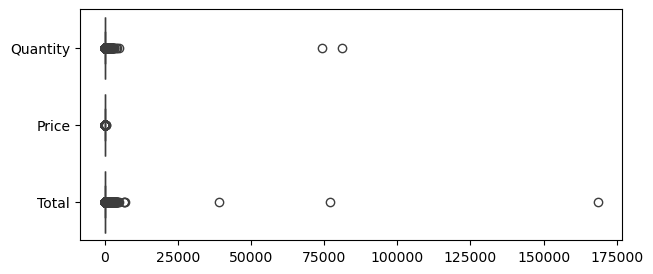

In [21]:
columns = ['Quantity', 'Price', 'Total']

sns.boxplot(df[columns], orient='h')
plt.gcf().set_size_inches(7,3)
plt.show()

In [22]:
outliers = []
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR

    filt = (df[column] > upper_boundary) | (df[column] < lower_boundary)
    df_outlier = df[filt].copy()
    print(column, ':', filt.sum())
    display(df_outlier.head(3))

    # Deleting Outliers in Order
    df.drop(index=df_outlier.index, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
display(df.tail(3))

Quantity : 23308


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
27,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583,France,40.80
40,536370,22492,MINI PAINT SET VINTAGE,36,2010-12-01 08:45:00,0.65,12583,France,23.40


Price : 31227


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.3
15,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047,United Kingdom,19.9
18,536367,21777,RECIPE BOX WITH METAL HEART,4,2010-12-01 08:34:00,7.95,13047,United Kingdom,31.8


Total : 12351


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
17,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.0
18,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.0
19,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.0


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
291388,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
291389,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
291390,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


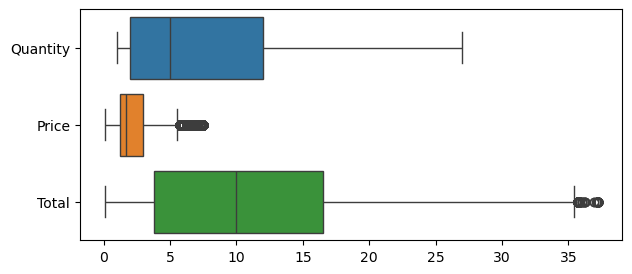

In [23]:
sns.boxplot(df[columns], orient='h')
plt.gcf().set_size_inches(7,3)
plt.show()

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; STOCK CODE and DESCRIPTION COMPATIBILITY - find same item with more than one description and change them with mode </p>

In [24]:
temp = df.loc[:500, :].copy()  # 2000
temp = temp.groupby('StockCode')['Description'].nunique()!=1
stockcodes = temp[temp].index # ==True

df[df['StockCode'].isin(stockcodes)].drop_duplicates(subset='Description')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
3,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.1
162,536398,22632,HAND WARMER RED RETROSPOT,12,2010-12-01 10:52:00,2.10,13448,United Kingdom,25.2


In [25]:
temp = df.groupby('StockCode')['Description'].nunique()!=1
stockcodes = temp[temp].index # ==True
print(stockcodes.size, stockcodes[:5].to_list())

166 [20622, 21109, 21112, 21175, 21232]


In [26]:
for stockcode in stockcodes:
    _mode = df[df['StockCode']==stockcode]['Description'].mode()[0]
    df.loc[df['StockCode']==stockcode, 'Description'] = _mode

In [27]:
temp = df.groupby('StockCode')['Description'].nunique()!=1
stockcodes = temp[temp].index # ==True
print(stockcodes.size, stockcodes[:5].to_list())

0 []


<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; </p>

In [28]:
temp = df.loc[:3000, :].copy()  # 10000
temp = temp.groupby('Description')['StockCode'].nunique()!=1
descriptions = temp[temp].index # ==True

df[df['Description'].isin(descriptions)].drop_duplicates(subset='StockCode')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
491,536446,10133,COLOURING PENCILS BROWN TUBE,5,2010-12-01 12:15:00,0.85,15983,United Kingdom,4.25
1460,536621,10135,COLOURING PENCILS BROWN TUBE,10,2010-12-02 10:35:00,1.25,13108,United Kingdom,12.50


In [29]:
temp = df.groupby('Description')['StockCode'].nunique()!=1
descriptions = temp[temp].index # ==True
print(descriptions.size, descriptions[:3].to_list())

9 ['COLOURING PENCILS BROWN TUBE', 'COLUMBIAN CANDLE RECTANGLE', 'COLUMBIAN CANDLE ROUND']


In [30]:
for description in descriptions:
    _mode = df[df['Description']==description]['StockCode'].mode()[0]
    df.loc[df['Description']==description, 'StockCode'] = _mode

In [31]:
temp = df.groupby('Description')['StockCode'].nunique()!=1
descriptions = temp[temp].index # ==True
print(descriptions.size, descriptions[:3].to_list())

0 []


In [32]:
temp = df.groupby('StockCode')['Description'].nunique()!=1
stockcodes = temp[temp].index # ==True
print(stockcodes.size, stockcodes[:5].to_list())

0 []


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; ADD FEATURES FOR DATES </p>

In [33]:
# df['Year'] = df['InvoiceDate'].dt.year
# df['Month'] = df['InvoiceDate'].dt.month
# df['Day'] = df['InvoiceDate'].dt.day
# # df['Day'] = df['InvoiceDate'].dt.dayofweek
# df['Day of Week'] = df['InvoiceDate'].dt.strftime('%a') # %A

# display(df.sample(3))

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
    &nbsp; SAVE CLEAN VERSION </p>

In [34]:
# df.to_csv('data/online_retail_II_clean.csv', index=False)